## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## Reading Data From CSV File

In [2]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Checking For Null Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Feature Analysis

### 1. Car Name
     Clearly Unique Car Names won't help our Model and also won't be feasible.
     But Car Company's reputation plays a big role in deciding resale value for a car
     so we try to extract out Company's Name from 'Car_Name'.  

In [10]:
df['Car_Name'].value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Bajaj Discover 100     1
Hero Splender Plus     1
Honda Activa 125       1
Bajaj Pulsar RS200     1
KTM 390 Duke           1
Name: Car_Name, Length: 98, dtype: int64

In [12]:
Car_detail = df['Car_Name'].unique()

In [13]:
Car_detail

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [19]:
Car_Names = pd.Series([i.split()[0] for i in Car_detail]).unique()

In [20]:
Car_Names

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [23]:
MS_cars = Car_Names[:14]
Toyota_cars = Car_Names[14:19]
Honda = ['Activa']
Hyundai_cars = Car_Names[32:]

In [24]:
MS_cars

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni'], dtype=object)

In [25]:
Toyota_cars

array(['fortuner', 'innova', 'corolla', 'etios', 'camry'], dtype=object)

In [27]:
Hyundai_cars

array(['i20', 'grand', 'i10', 'eon', 'xcent', 'elantra', 'creta', 'verna',
       'city', 'brio', 'amaze', 'jazz'], dtype=object)

In [29]:
df['Car_Company'] = df['Car_Name'].apply(lambda x : x.split()[0])
df.Car_Company.replace(MS_cars,'Maruti Suzuki',inplace=True)
df.Car_Company.replace(Toyota_cars,'Toyota',inplace=True)
df.Car_Company.replace(Honda,'Honda',inplace=True)
df.Car_Company.replace(Hyundai_cars,'Hyundai',inplace=True)
df.Car_Company.replace(['land','Royal'],['Land Rover','Royal Enfield'],inplace=True)
df.Car_Company.unique()

array(['Maruti Suzuki', 'Toyota', 'Land Rover', 'Royal Enfield', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Suzuki', 'Hyundai'], dtype=object)

In [30]:
df['Percent_Resale'] = (df['Selling_Price']/df['Present_Price'])*100

Car_Company
Bajaj            58.619737
Hero             59.116273
Honda            60.218529
Hyosung          39.130435
Hyundai          68.653446
KTM              66.247763
Land Rover       37.796976
Mahindra         82.142857
Maruti Suzuki    63.783082
Royal Enfield    73.859941
Suzuki           43.103448
TVS              66.109657
Toyota           52.775760
UM               93.406593
Yamaha           69.350963
Name: Percent_Resale, dtype: float64

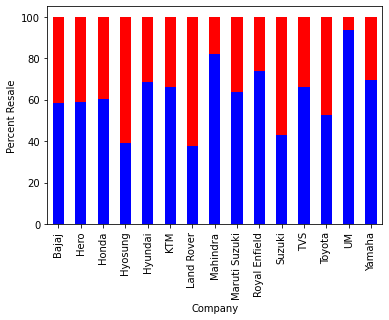

In [34]:
Cmpny_Anyls = df.groupby('Car_Company')['Percent_Resale'].mean()
Cmpny_Anyls = pd.concat([Cmpny_Anyls, 100-Cmpny_Anyls], axis=1)
Cmpny_Anyls.plot.bar(stacked=True,legend=False,color=['Blue','Red'])
plt.ylabel('Percent Resale')
plt.xlabel('Company')
Cmpny_Anyls.iloc[:,0]

###  2. Years
       As the car gets older its selling price decreases

In [35]:
df['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64

In [36]:
Y_Analys = df.groupby('Year')['Percent_Resale'].mean()
Y_Analys

Year
2003    21.773183
2004    12.145749
2005    28.392803
2006    19.200326
2007    23.678161
2008    29.434387
2009    31.240846
2010    38.917507
2011    49.155632
2012    50.664700
2013    56.849238
2014    61.606208
2015    72.207063
2016    78.729945
2017    87.851181
2018    94.099695
Name: Percent_Resale, dtype: float64

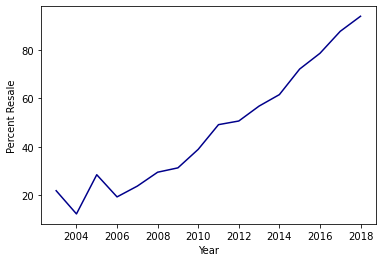

In [37]:
Y_Analys.plot(color='darkblue')
plt.ylabel('Percent Resale')
plt.show()

In [38]:
df['Years_Old'] = df['Year'].apply(lambda x: 2021-x)

<AxesSubplot:xlabel='Kms_Driven'>

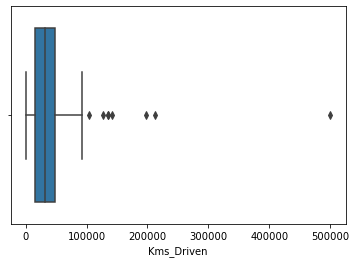

In [41]:
sns.boxplot(x = df['Kms_Driven'], data=df)

### 3. Kms Driven
     Kms_Driven is the value of how much the car has been driven since when it was purchased
     As this Value Increases Price Decreases

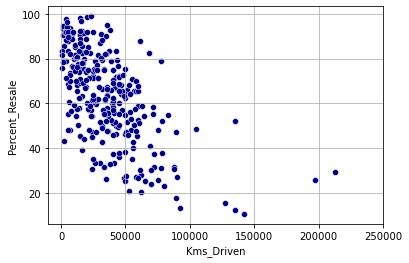

In [43]:
sns.scatterplot(x = df['Kms_Driven'], y = df['Percent_Resale'], data = df, color='darkblue')
plt.xlim(-10000, 250000)
plt.grid(True)

### 4. Fuel Type

Fuel_Type
CNG       50.982191
Diesel    67.964541
Petrol    62.414885
Name: Percent_Resale, dtype: float64

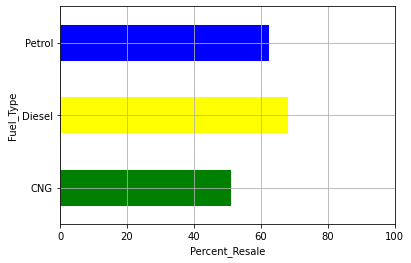

In [46]:
df.groupby('Fuel_Type').Percent_Resale.mean().plot(kind='barh',color=['green','yellow','blue'])
plt.xlim([0, 100])
plt.xlabel('Percent_Resale')
plt.grid(True)
df.groupby('Fuel_Type').Percent_Resale.mean()

### 5. Seller Type

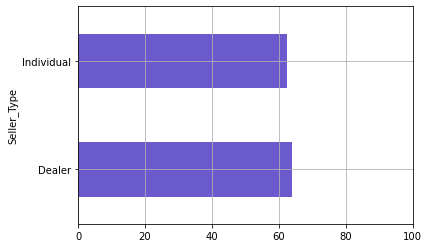

In [49]:
df.groupby('Seller_Type').Percent_Resale.mean().plot(kind='barh',color='slateblue')
plt.xlim([0,100])
plt.grid(True)

### 6. Transmission

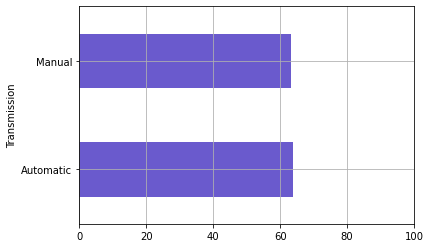

In [50]:
df.groupby('Transmission').Percent_Resale.mean().plot(kind='barh',color='slateblue')
plt.xlim([0,100])
plt.grid(True)

### 7. Owner

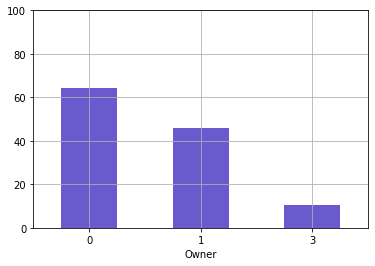

In [57]:
df.groupby('Owner').Percent_Resale.mean().plot(kind='bar',color='slateblue')
plt.ylim([0,100])
plt.xticks(rotation=360)
plt.grid(True)

### Preparing Our Model

In [58]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Company,Percent_Resale,Years_Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Maruti Suzuki,59.928444,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Maruti Suzuki,49.790356,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Maruti Suzuki,73.604061,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Maruti Suzuki,68.674699,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Maruti Suzuki,66.957787,7


Dropping irrelevant columns from our data

In [59]:
df.drop(['Car_Name','Year','Percent_Resale'],axis=1,inplace=True)

In [61]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Company,Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,Maruti Suzuki,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,Maruti Suzuki,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,Maruti Suzuki,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,Maruti Suzuki,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,Maruti Suzuki,7


In [62]:
df['Car_Company'].unique()

array(['Maruti Suzuki', 'Toyota', 'Land Rover', 'Royal Enfield', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Suzuki', 'Hyundai'], dtype=object)

#### Getting Dummy Variables for Categorical Data

In [65]:
pd.get_dummies(df['Car_Company'], drop_first=True)

,Hero,Honda,Hyosung,Hyundai,KTM,Land Rover,Mahindra,Maruti Suzuki,Royal Enfield,Suzuki,TVS,Toyota,UM,Yamaha
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,1,0,0,0,0,0,0,0,0,0,0
297,0,0,0,1,0,0,0,0,0,0,0,0,0,0
298,0,0,0,1,0,0,0,0,0,0,0,0,0,0
299,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [66]:
df.tail()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Company,Years_Old
296,9.50,11.6,33988,Diesel,Dealer,Manual,0,Hyundai,5
297,4.00,5.9,60000,Petrol,Dealer,Manual,0,Hyundai,6
298,3.35,11.0,87934,Petrol,Dealer,Manual,0,Hyundai,12
299,11.50,12.5,9000,Diesel,Dealer,Manual,0,Hyundai,4
300,5.30,5.9,5464,Petrol,Dealer,Manual,0,Hyundai,5


In [76]:
num_col = df._get_numeric_data().columns
cat_col = list(set(df.columns)-set(num_col))
print(cat_col)
for col in cat_col:
    dum = pd.get_dummies(df[col],drop_first=True)
    df = pd.concat([df,dum],axis=1)
    df.drop(col, axis=1, inplace=True)
print(df.shape)
df.head()

['Fuel_Type', 'Seller_Type', 'Transmission', 'Car_Company']
(301, 23)


,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Diesel,Petrol,Individual,Manual,Hero,...,KTM,Land Rover,Mahindra,Maruti Suzuki,Royal Enfield,Suzuki,TVS,Toyota,UM,Yamaha
0,3.35,5.59,27000,0,7,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,4.75,9.54,43000,0,8,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,7.25,9.85,6900,0,4,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2.85,4.15,5200,0,10,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,4.60,6.87,42450,0,7,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

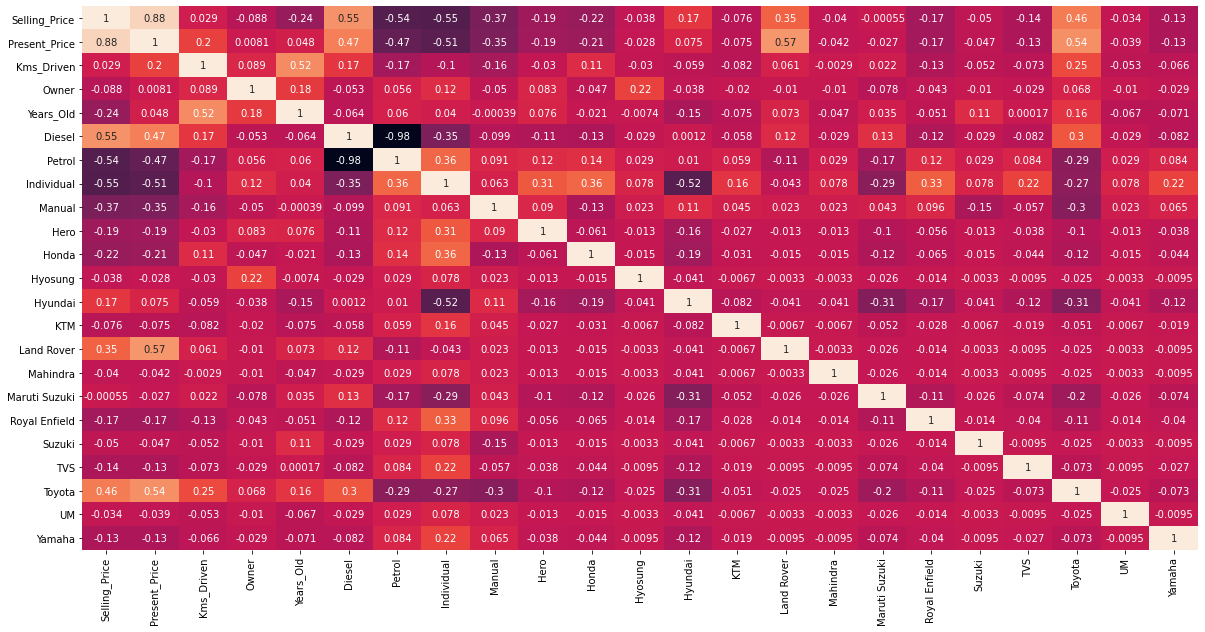

In [78]:
ax = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cbar=False)

### Splitting the data into training and testing 

In [90]:
X = df.drop('Selling_Price', axis=1).copy()
y = df['Selling_Price']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=22)

### Checking Importance of Each Feature

In [91]:
test_model = ExtraTreesRegressor()
test_model.fit(X_train, y_train)
test_pred = test_model.predict(X_test)
feat_imp = dict(zip(X_train.columns, test_model.feature_importances_))
print(np.sqrt(mean_squared_error(y_test, test_pred)))
print(r2_score(y_test, test_pred))
feat_imp

1.581392951602179
0.8157750700223729


{'Present_Price': 0.4305506939087176,
 'Kms_Driven': 0.02738974902588268,
 'Owner': 0.00019401836919924722,
 'Years_Old': 0.06082541071310196,
 'Diesel': 0.19749383176336635,
 'Petrol': 0.007447183449120109,
 'Individual': 0.10512606185995917,
 'Manual': 0.1176889927696237,
 'Hero': 3.56963217253511e-06,
 'Honda': 2.8586521314155032e-05,
 'Hyosung': 6.641738497060314e-05,
 'Hyundai': 0.003055366056645738,
 'KTM': 0.00020327733961967385,
 'Land Rover': 0.035227363553036545,
 'Mahindra': 1.4874286523398073e-05,
 'Maruti Suzuki': 0.003080376996075563,
 'Royal Enfield': 0.0004936117580525508,
 'Suzuki': 2.9551683276197335e-07,
 'TVS': 7.790607155468586e-06,
 'Toyota': 0.011095083385905861,
 'UM': 0.0,
 'Yamaha': 7.445102724300963e-06}

In [94]:
X = df.drop(['Selling_Price','UM','Suzuki'],axis=1).copy()
y = df['Selling_Price']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=22)
test_model = ExtraTreesRegressor()
test_model.fit(X_train, y_train)
test_pred = test_model.predict(X_test)
feat_imp = dict(zip(X_train.columns, test_model.feature_importances_))
print(np.sqrt(mean_squared_error(y_test, test_pred)))
print(r2_score(y_test, test_pred))
feat_imp

1.3259744543567042
0.8704793196554768


{'Present_Price': 0.3807166045718105,
 'Kms_Driven': 0.030073138568408878,
 'Owner': 0.00017267019280638862,
 'Years_Old': 0.05869444418139629,
 'Diesel': 0.22181839443351062,
 'Petrol': 0.006756315128555933,
 'Individual': 0.10833820769233563,
 'Manual': 0.13237352620307186,
 'Hero': 3.498546670473493e-06,
 'Honda': 4.01563010616105e-05,
 'Hyosung': 3.5467894792967075e-05,
 'Hyundai': 0.0037554224429535515,
 'KTM': 0.00015508412095464985,
 'Land Rover': 0.04465568109409295,
 'Mahindra': 9.251304636569297e-06,
 'Maruti Suzuki': 0.002698400748608955,
 'Royal Enfield': 0.000402752390072525,
 'TVS': 7.126826527170896e-06,
 'Toyota': 0.009287316606513307,
 'Yamaha': 6.540751219335284e-06}

### Hyper Parameter Tuning

In [95]:
reg = RandomForestRegressor(oob_score=True)
prm_grid = dict(n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                max_depth = [None, 4, 7, 10, 12, 15, 20],
                min_samples_split = [2, 5, 8, 10, 12, 15, 20])
grid = RandomizedSearchCV(reg, prm_grid, n_iter=5, scoring='neg_root_mean_squared_error',cv=5, verbose=5)
grid.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV 2/5] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV 3/5] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV 4/5] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV 5/5] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV 1/5] END max_depth=20, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_split=15, n_estimators=800; tot

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 4, 7, 10, 12, 15,
                                                      20],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_root_mean_squared_error', verbose=5)

In [96]:
print(grid.best_score_)

-1.5890609030555


In [97]:
print(grid.best_estimator_)

RandomForestRegressor(max_depth=20, min_samples_split=10, oob_score=True)


In [98]:
param = grid.best_params_
param

{'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 20}

In [99]:
reg =  RandomForestRegressor(**param ,oob_score=True)
reg.fit(X,y)
reg.oob_score_

0.8843447316053505